# Tutorial 1
### Creating `Epochs` from `MNE.Epochs`

In [4]:
import epoch_tools as et
import mne

Load an `MNE.Epochs` file

In [6]:
mne_epochs = mne.read_epochs('test_data/mne_epochs-epo.fif')

Reading d:\RA\custom_libs\epoch_tools\tutorials\test_data\mne_epochs-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4999.45 ms
        0 CTF compensation matrices available
Adding metadata with 257 columns
3953 matching events found
No baseline correction applied
0 projection items activated


In [7]:
mne_epochs.metadata.columns

Index(['og_id', 'animal_id', 'genotype', 'batch', 'start_sample', 'end_sample',
       'start_frame', 'end_frame', 'ploss_ratio', 'bad',
       ...
       'STR_R_theta_delta_ratio', 'STR_R_band3', 'STR_R_band4', 'STR_R_band5',
       'STR_R_band6', 'STR_R_band7', 'STR_R_band8', 'STR_R_band9',
       'STR_R_band10', 'STR_R_entropy'],
      dtype='object', length=257)

In [8]:
# By checking the columns of the metadata, we can see which columns are not feature columns
# These should be specified in the non_feature_columns list when initializing the Epochs object
non_feature_columns = ['og_id', 'animal_id', 'genotype', 'batch', 'start_sample', 'end_sample',
    'start_frame', 'end_frame', 'ploss_ratio', 'bad', 'nose_max_speed',
    'center_max_speed', 'tail_max_speed', 'transmitter_max_speed']

# (Optional) specifiy subject/animal_id or condition
animal_id = "78227"
condition = "KO"

# Initialize the Epochs object
epochs = et.Epochs(mne_epochs, non_feature_columns, animal_id, condition)
epochs

Slicing the epochs to create a subset (e.g. select good quality epochs)

In [9]:
epochs.metadata

,og_id,animal_id,genotype,batch,start_sample,end_sample,start_frame,end_frame,ploss_ratio,bad,...,STR_R_theta_delta_ratio,STR_R_band3,STR_R_band4,STR_R_band5,STR_R_band6,STR_R_band7,STR_R_band8,STR_R_band9,STR_R_band10,STR_R_entropy
0,0,78227,DRD2-KO,1,0,5424,NaN,NaN,0.125553,True,...,-3.671855,-76.022199,-76.380842,-77.033404,-77.639722,-78.076580,-80.472494,-83.480270,-87.111698,6.685264
1,1,78227,DRD2-KO,1,5423,10847,NaN,NaN,0.035398,False,...,-1.566831,-74.436088,-74.446885,-76.265476,-77.416146,-76.580511,-79.001190,-82.799705,-85.434975,6.891241
2,2,78227,DRD2-KO,1,10847,16271,27.0,177.0,0.080199,True,...,-1.688646,-75.709092,-76.392308,-76.521617,-76.684393,-74.008316,-77.967033,-82.933691,-86.634952,6.789211
3,3,78227,DRD2-KO,1,16270,21694,177.0,327.0,0.184919,True,...,-5.052712,-75.771157,-76.000293,-77.642635,-77.063219,-77.272807,-80.399597,-84.283892,-88.449659,6.657281
4,4,78227,DRD2-KO,1,21694,27118,327.0,477.0,0.000000,False,...,-2.785029,-76.185790,-75.613225,-77.029736,-77.206400,-74.091209,-77.629490,-82.676076,-86.040880,7.039608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,3948,78227,DRD2-KO,1,21412354,21417778,591267.0,591417.0,0.073562,True,...,-0.176983,-75.383986,-77.968813,-77.435295,-76.493195,-77.603228,-79.950196,-82.921342,-85.660535,6.436666
3949,3949,78227,DRD2-KO,1,21417777,21423201,591417.0,591567.0,0.000000,False,...,2.260253,-75.599230,-78.056863,-77.470832,-76.689513,-76.460811,-79.446343,-81.905339,-85.635872,6.421256
3950,3950,78227,DRD2-KO,1,21423201,21428625,NaN,NaN,0.000000,False,...,1.425963,-75.639634,-77.604950,-77.026924,-75.585117,-76.290952,-78.869302,-83.225233,-85.964341,6.664222
3951,3951,78227,DRD2-KO,1,21428624,21434048,NaN,NaN,0.000000,False,...,1.732503,-75.078273,-76.659801,-77.507717,-76.433494,-76.792611,-79.949486,-82.885804,-87.255492,6.610834


In [25]:
subset = epochs[(epochs.metadata['ploss_ratio']<0.1) & (epochs.metadata['transmitter_max_speed']<3)] # Less than 10% of the samples are lost & Speed less than 3 pixels/frame, for immobility epochs


subset

### Various plotting options available

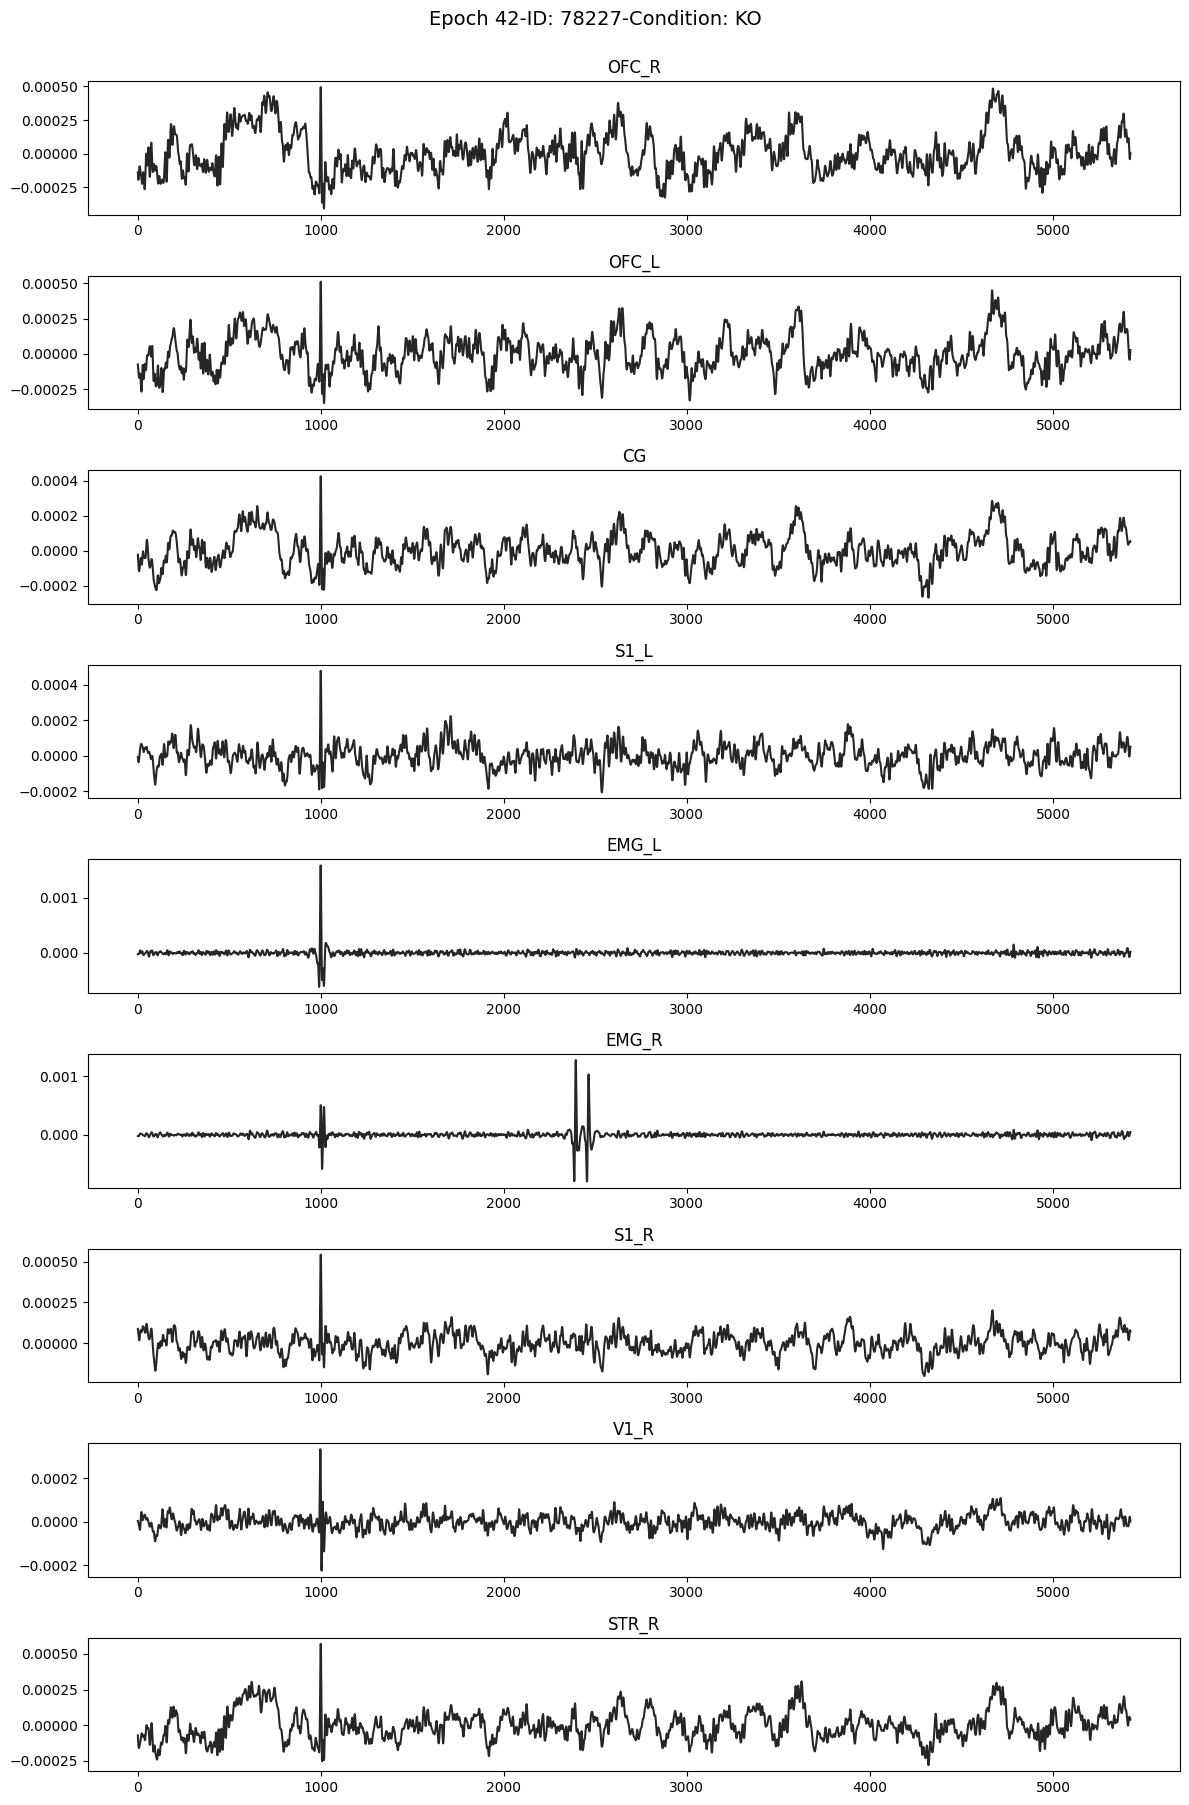

In [13]:
epochs.plot_epoch(idx=42) # specify the index of the epoch to plot

# or plot a random epoch
# subset.plot_epoch()

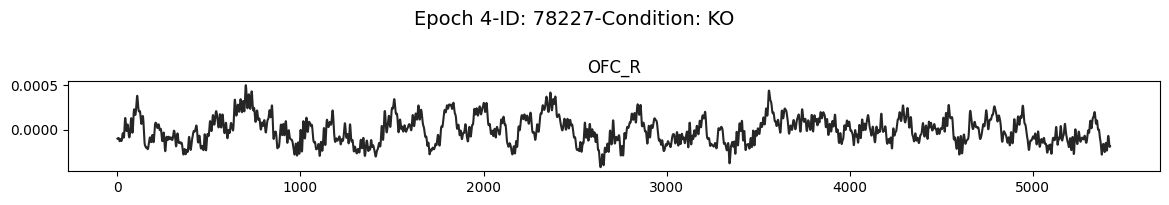

In [15]:
# Or plot a specific channel
epochs.plot_epoch(idx=4, channels=['OFC_R'])

    Using multitaper spectrum estimation with 7 DPSS windows


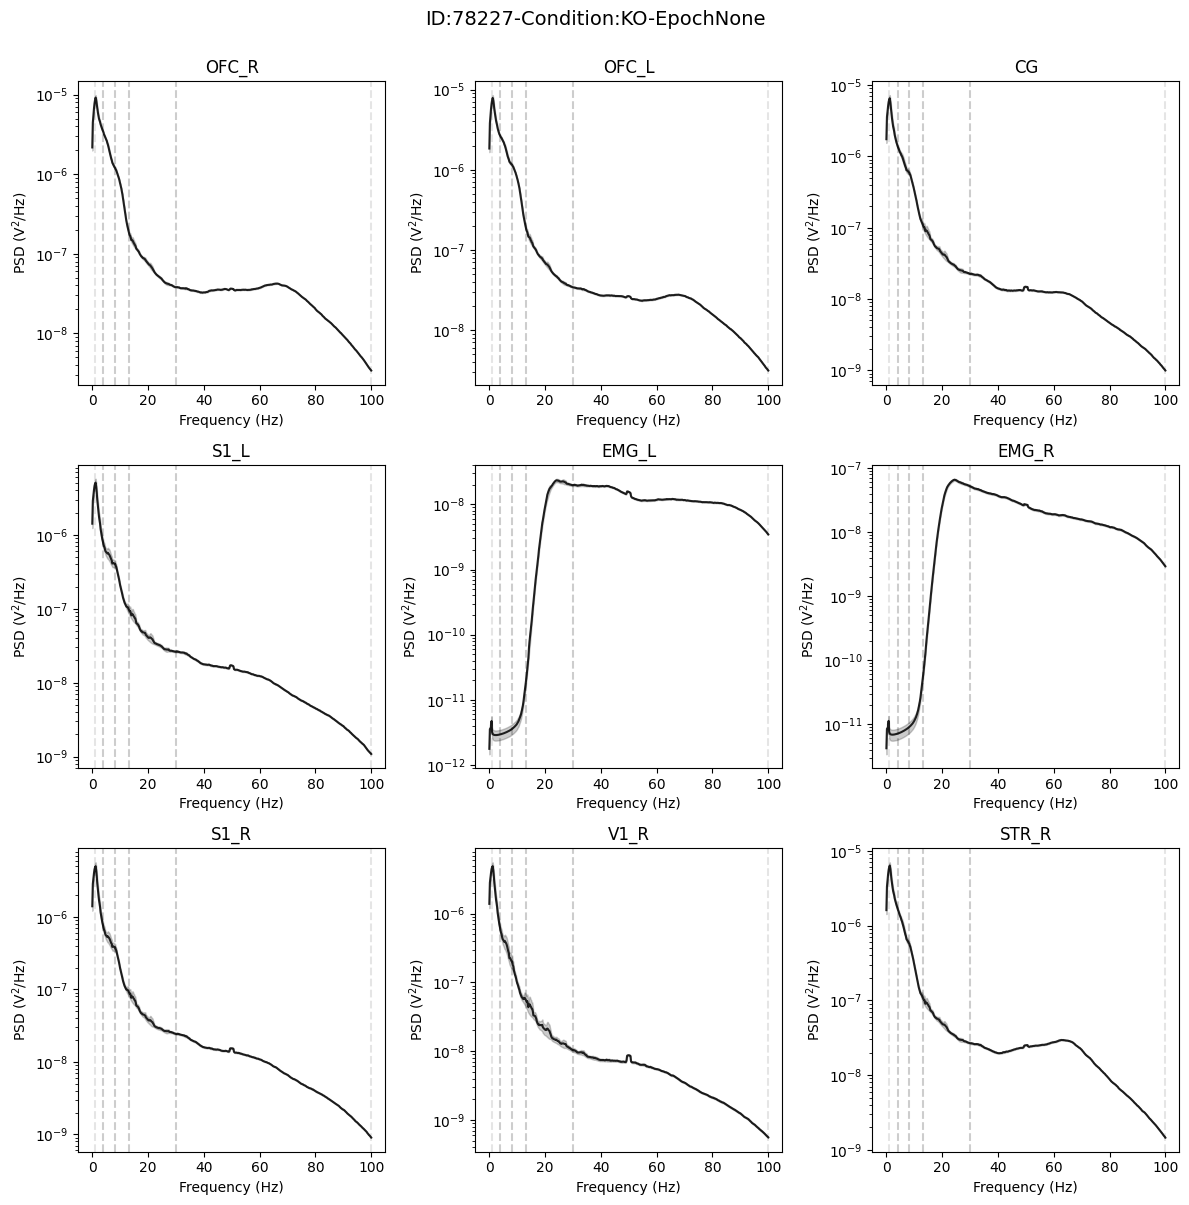

In [16]:
# Plotting PSD
# There are two options here, one from MNE(epochs.plot_psd()) and 
# one from the epoch_tools object itself (epochs.plot_psd_())

epochs.plot_psd_(channels='all', fmin=0, fmax=100, 
                log=True, norm=False, err_method='sem', epoch_idx = None)
# specify the index of the epoch to plot, or leave it as None to plot all epochs

    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\basil\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


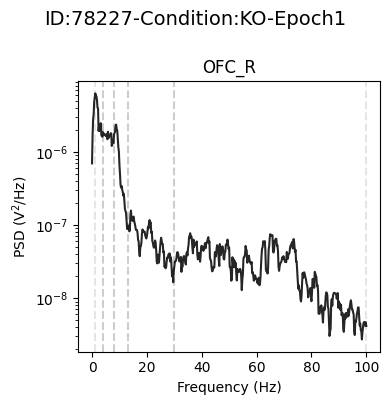

In [18]:
# specify the index of the epoch to plot, or leave it as None to plot all epochs
epochs.plot_psd_(err_method='ci', channels=['OFC_R'], epoch_idx=1)

## Saving `Epochs`

You can save/load epochs, as .gz files

In [26]:
subset.save_gz("test_data/tutorial1_Epochs.gz", overwrite=True)

# Combining epochs

You can create an Epochs object that contains multiple concatatenated epochs together, which is useful for PSD, or connectivity analysis 

In [27]:
all_epochs = et.Epochs.concatenate([epochs, subset]) # Concatenate a list of et.Epochs objects

Adding metadata with 257 columns
4105 matching events found
No baseline correction applied
Replacing existing metadata with 257 columns


# PSD analysis
You can use the `Epochs.compare_psd(...)` method to compare and visualize power spectral density (PSD) across experimental groups. Experimental groups should be specified in the epochs metadata. See [API_reference](../API_reference.md) for more details on how to use this method.

In [29]:
all_epochs.metadata.head()

,og_id,animal_id,genotype,batch,start_sample,end_sample,start_frame,end_frame,ploss_ratio,bad,...,STR_R_theta_delta_ratio,STR_R_band3,STR_R_band4,STR_R_band5,STR_R_band6,STR_R_band7,STR_R_band8,STR_R_band9,STR_R_band10,STR_R_entropy
0,0,78227,DRD2-KO,1,0,5424,NaN,NaN,0.125553,True,...,-3.671855,-76.022199,-76.380842,-77.033404,-77.639722,-78.076580,-80.472494,-83.480270,-87.111698,6.685264
1,1,78227,DRD2-KO,1,5423,10847,NaN,NaN,0.035398,False,...,-1.566831,-74.436088,-74.446885,-76.265476,-77.416146,-76.580511,-79.001190,-82.799705,-85.434975,6.891241
2,2,78227,DRD2-KO,1,10847,16271,27.0,177.0,0.080199,True,...,-1.688646,-75.709092,-76.392308,-76.521617,-76.684393,-74.008316,-77.967033,-82.933691,-86.634952,6.789211
3,3,78227,DRD2-KO,1,16270,21694,177.0,327.0,0.184919,True,...,-5.052712,-75.771157,-76.000293,-77.642635,-77.063219,-77.272807,-80.399597,-84.283892,-88.449659,6.657281
4,4,78227,DRD2-KO,1,21694,27118,327.0,477.0,0.000000,False,...,-2.785029,-76.185790,-75.613225,-77.029736,-77.206400,-74.091209,-77.629490,-82.676076,-86.040880,7.039608


Effective window size : 0.999 (s)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


C:\Users\basil\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\basil\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'OFC_R'}, xlabel='Frequency (Hz)', ylabel='PSD (V$^{2}$/Hz)'>,
        <Axes: title={'center': 'OFC_L'}, xlabel='Frequency (Hz)'>],
       dtype=object))

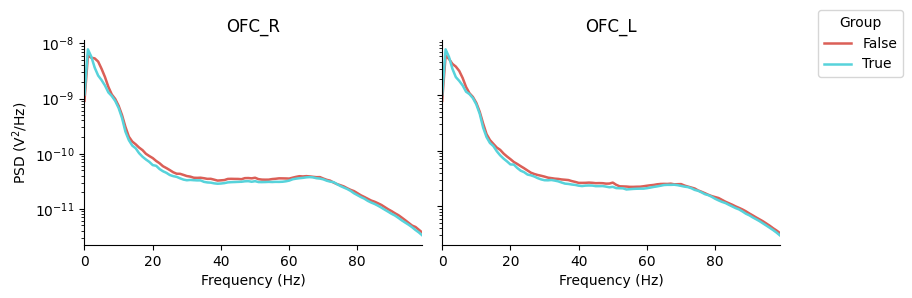

In [ ]:
all_epochs.compare_psd(
    hue='bad',
    channels=['OFC_R', 'OFC_L'],
    avg_level = "subject",
    plot_individual_points=True,
    plot_type = "line",

)

# Connectivity analysis

Similarly we can the `compare_con` method to analyze and plot functional connectivity (bivariate or multivariate) across experimental groups. See [API_reference](../API_reference.md) for more details on how to use this method.

Computing connectivity: 100%|██████████| 2/2 [01:39<00:00, 49.52s/it]


(<Figure size 2000x800 with 20 Axes>,
 array([[<Axes: title={'center': 'bad=False\nDelta'}>,
         <Axes: title={'center': 'bad=False\nTheta'}>,
         <Axes: title={'center': 'bad=False\nAlpha'}>,
         <Axes: title={'center': 'bad=False\nBeta'}>,
         <Axes: title={'center': 'bad=False\nGamma'}>],
        [<Axes: title={'center': 'bad=True\nDelta'}>,
         <Axes: title={'center': 'bad=True\nTheta'}>,
         <Axes: title={'center': 'bad=True\nAlpha'}>,
         <Axes: title={'center': 'bad=True\nBeta'}>,
         <Axes: title={'center': 'bad=True\nGamma'}>]], dtype=object))

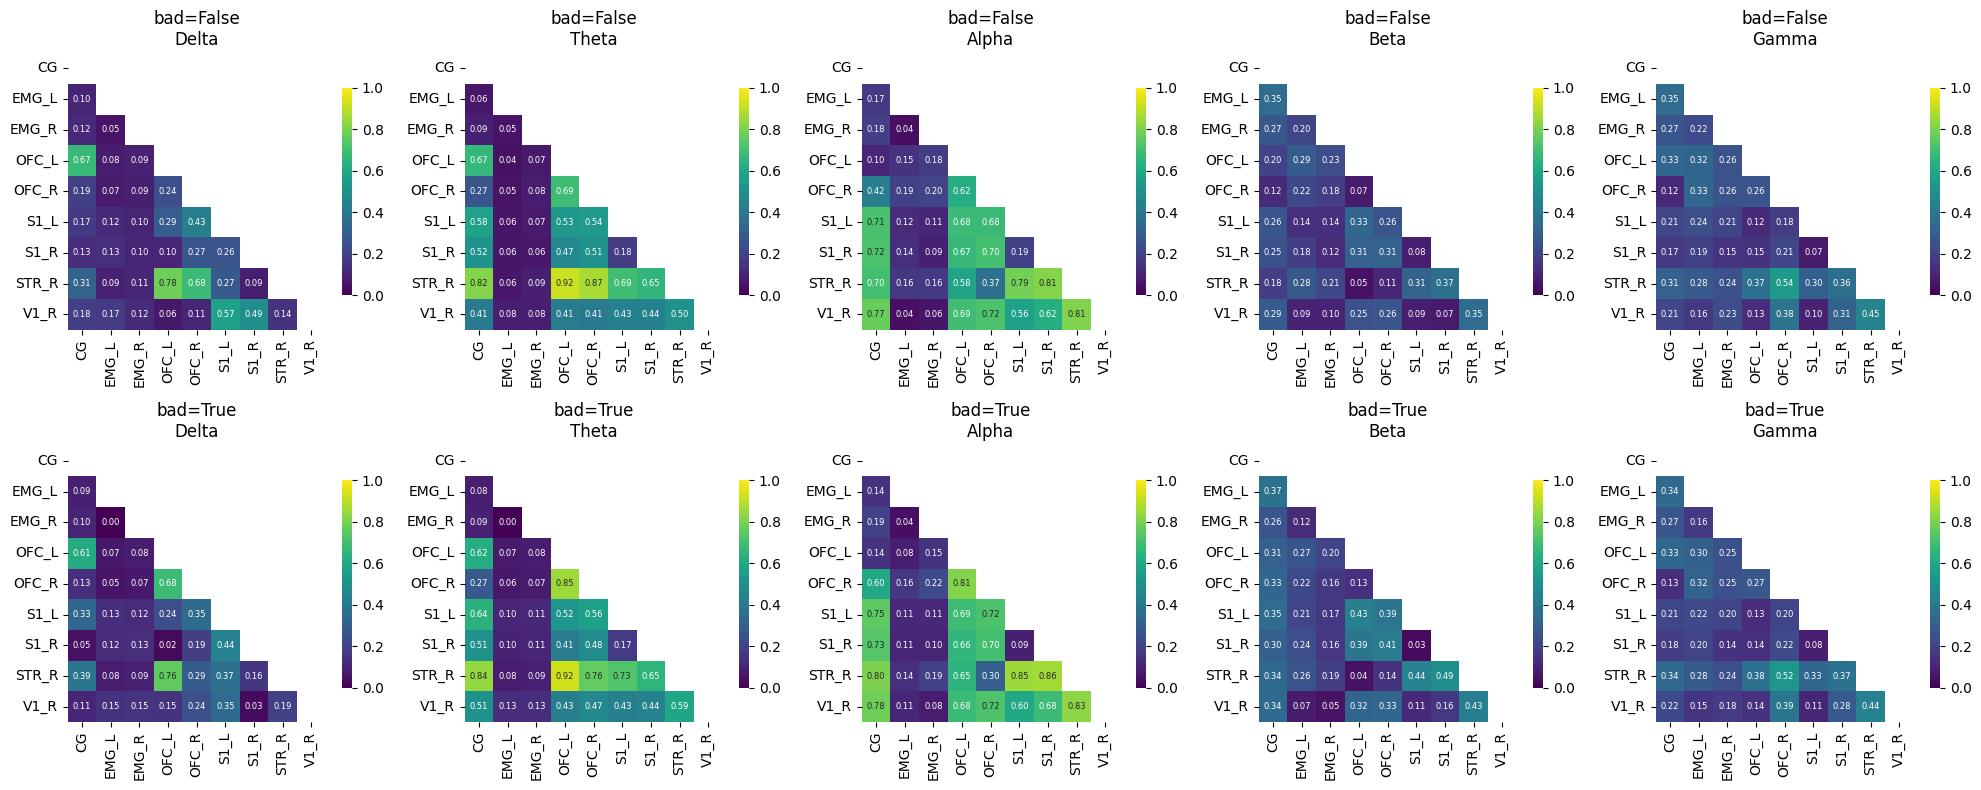

In [32]:
all_epochs.compare_con(
    hue='bad',
    method='wpli',
    plot_type='heatmap',
    avg_level = "all",

)

Computing connectivity: 100%|██████████| 2/2 [01:37<00:00, 48.95s/it]


(<Figure size 2000x800 with 20 Axes>,
 array([[<Axes: title={'center': 'bad=False\nDelta'}>,
         <Axes: title={'center': 'bad=False\nTheta'}>,
         <Axes: title={'center': 'bad=False\nAlpha'}>,
         <Axes: title={'center': 'bad=False\nBeta'}>,
         <Axes: title={'center': 'bad=False\nGamma'}>],
        [<Axes: title={'center': 'bad=True\nDelta'}>,
         <Axes: title={'center': 'bad=True\nTheta'}>,
         <Axes: title={'center': 'bad=True\nAlpha'}>,
         <Axes: title={'center': 'bad=True\nBeta'}>,
         <Axes: title={'center': 'bad=True\nGamma'}>]], dtype=object))

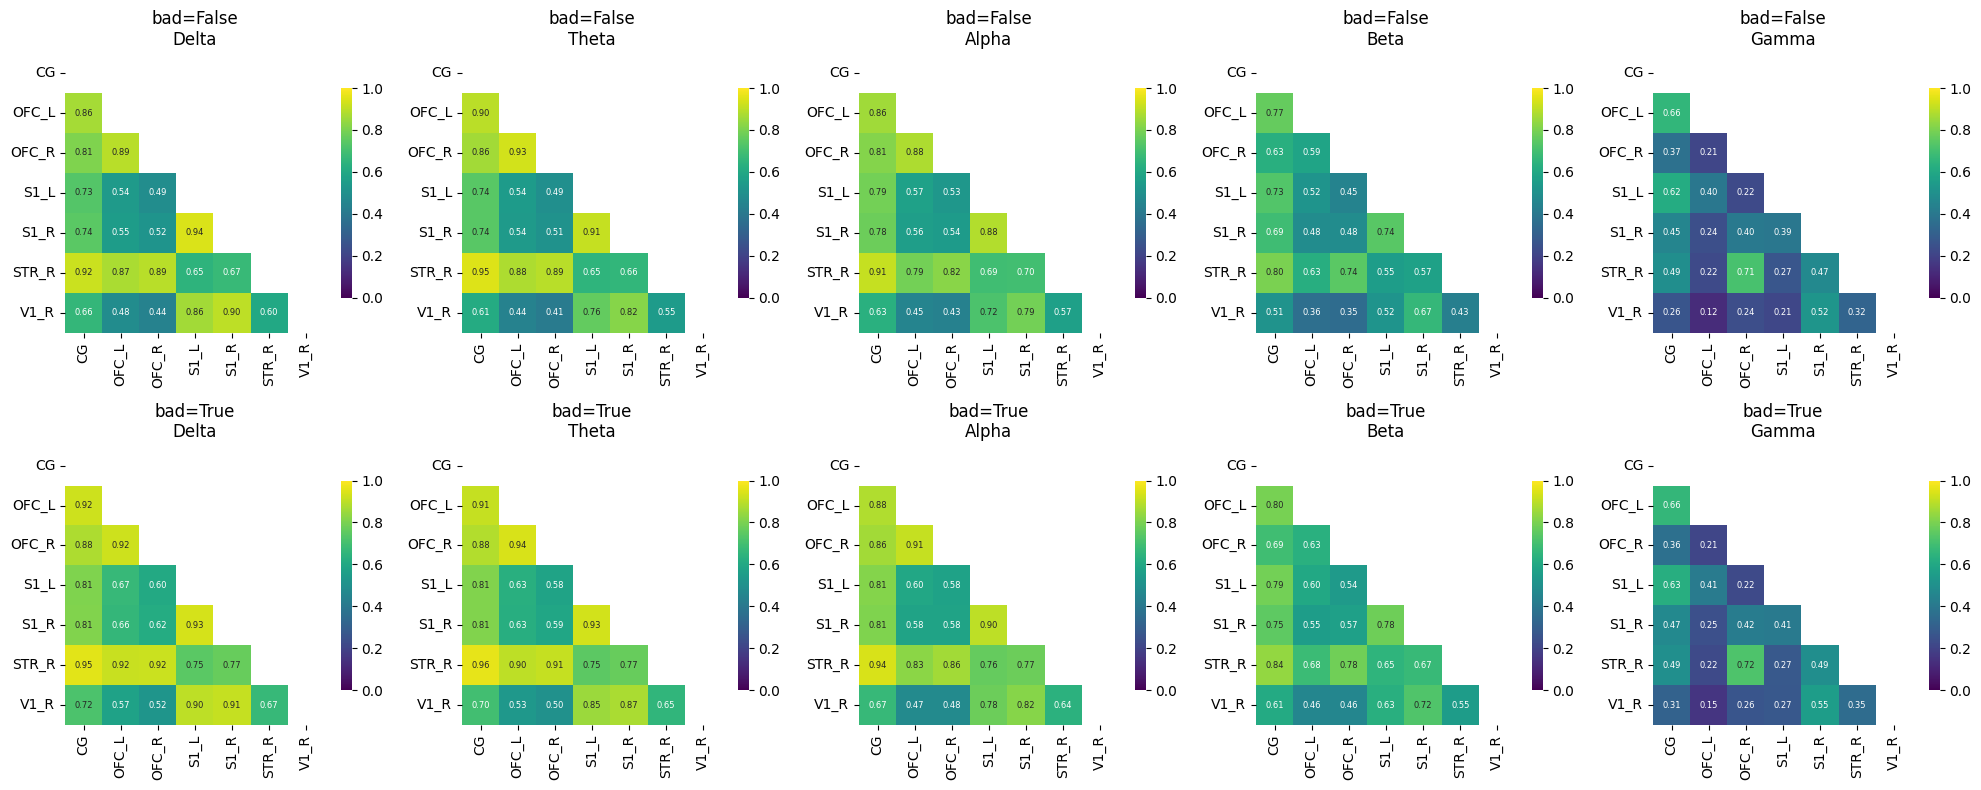

In [33]:
all_epochs.compare_con(
    hue='bad',
    method='coh',
    plot_type='heatmap',
    avg_level = "all",
    bad_channels = {
        None: ['EMG_L', 'EMG_R'], # Specify bad channels to be excluded from the analysis
    }

)

(<Figure size 2700x1400 with 24 Axes>,
 array([<Axes: title={'center': 'OFC_R–OFC_L'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_R–CG'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_R–S1_L'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_R–S1_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_R–V1_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_R–STR_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_L–CG'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_L–S1_L'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_L–S1_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_L–V1_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'OFC_L–STR_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'CG–S1_L'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'CG–S1_R'}, ylabel='Connectivity'>,
        <Axes: title={'center': 'CG–V1_R'}, y

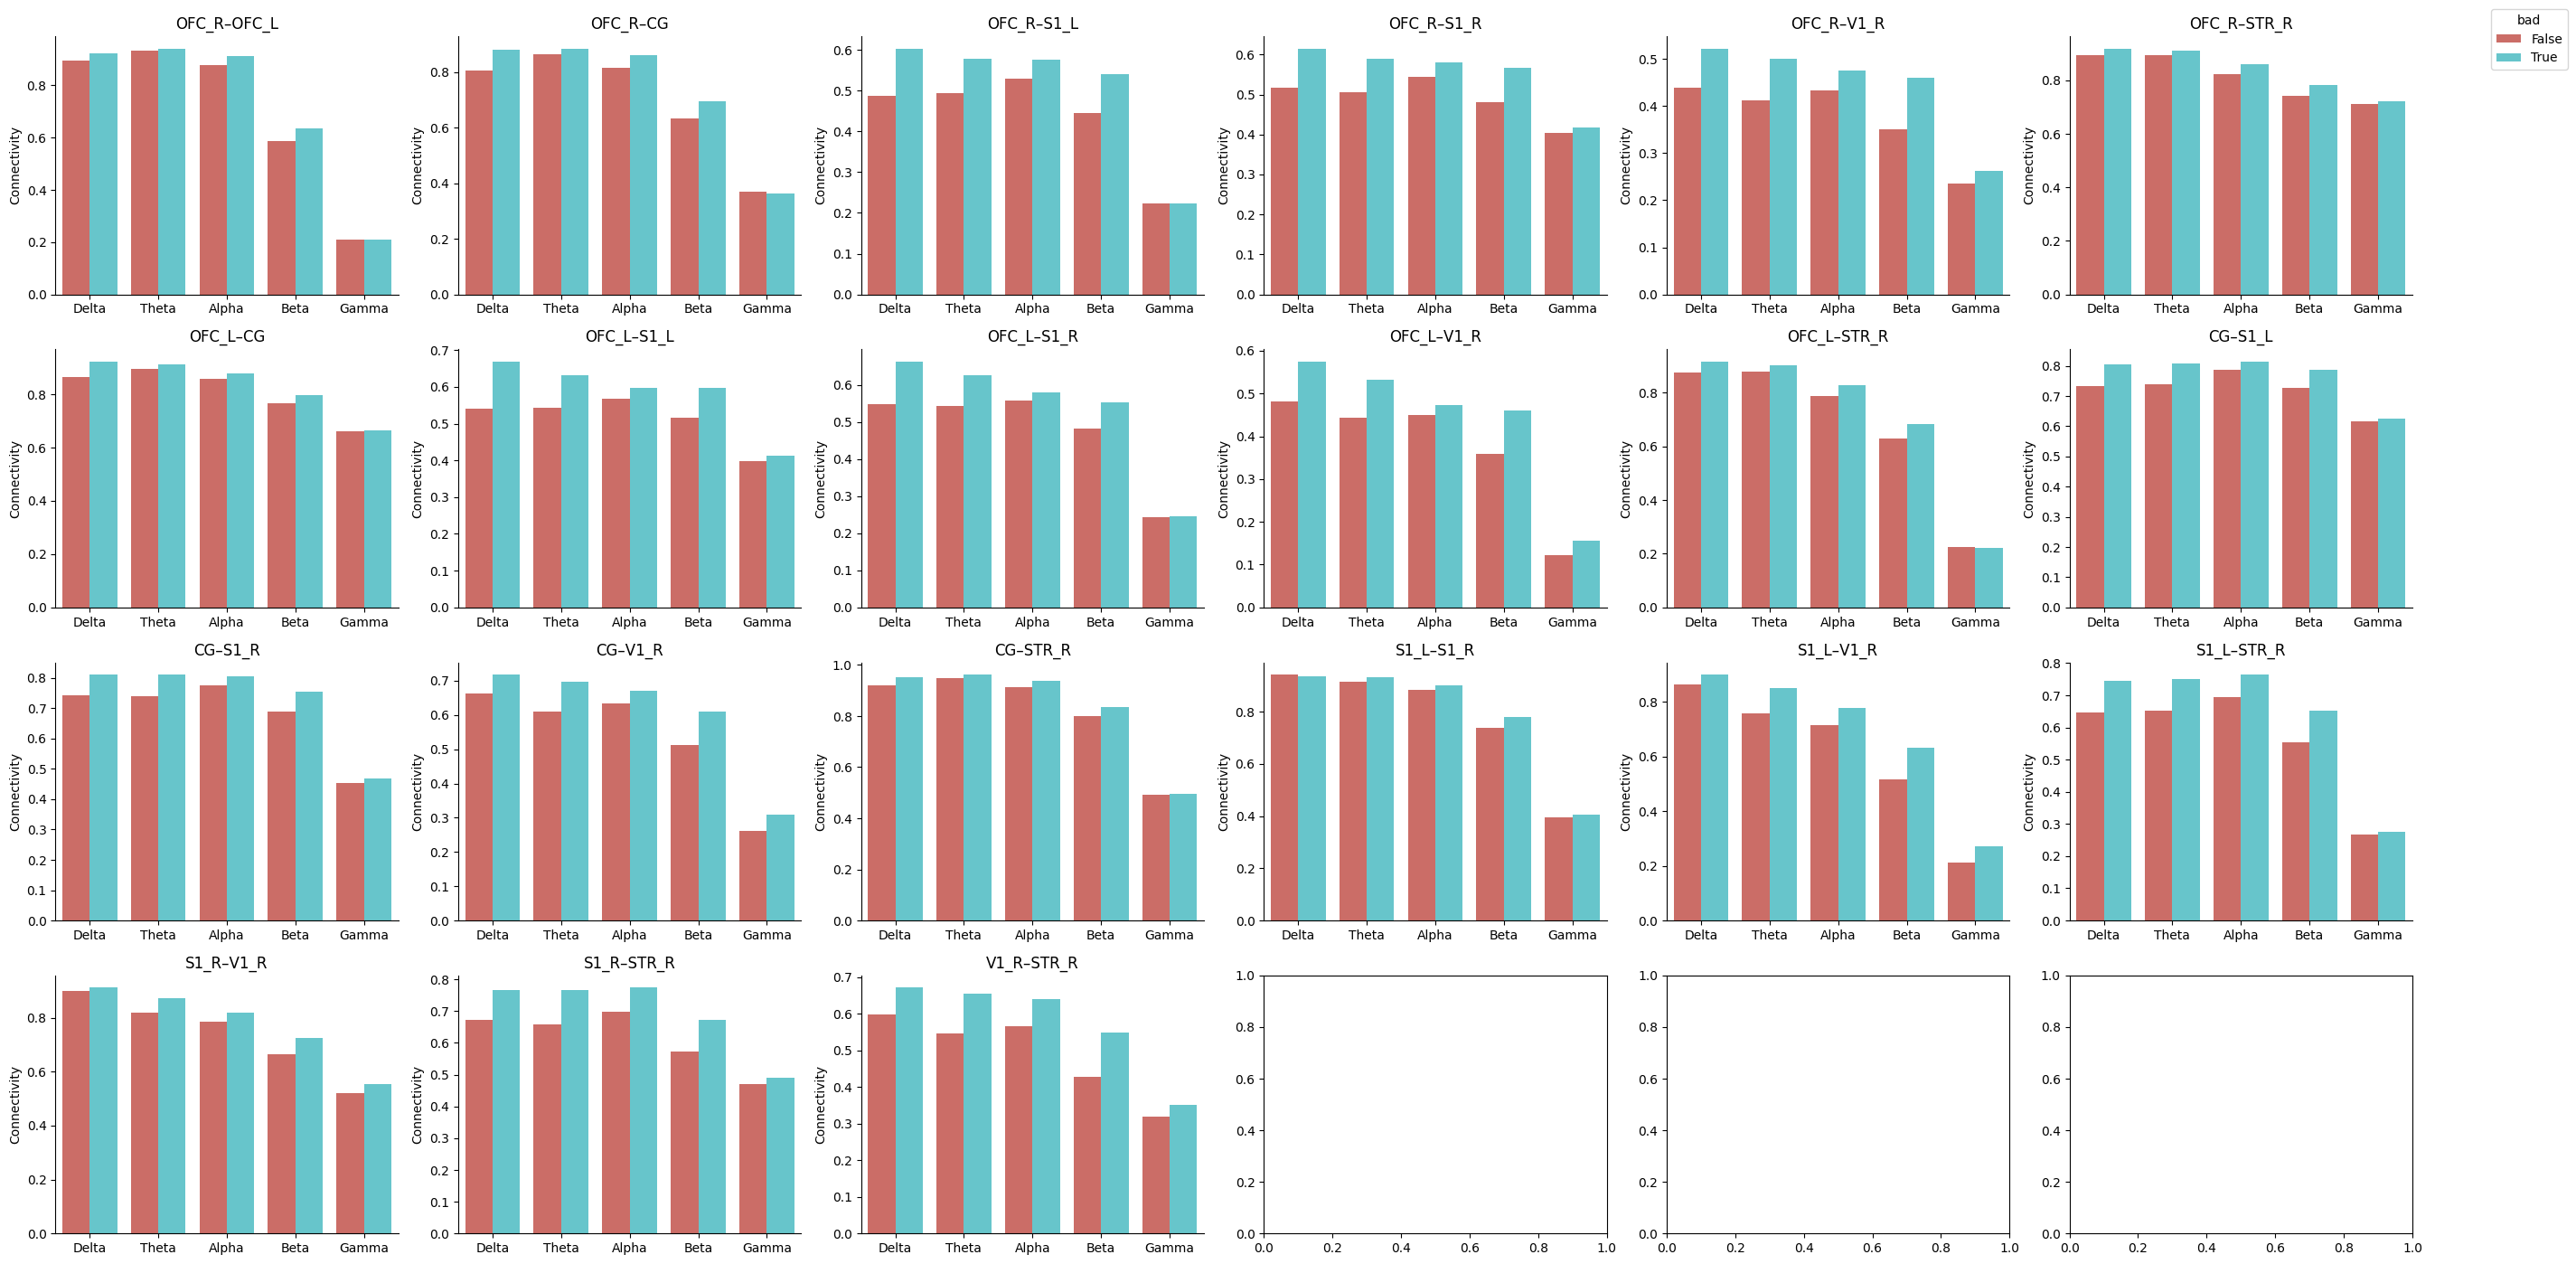

In [34]:
all_epochs.compare_con(
    hue='bad',
    method='coh',
    plot_type='bar',
    avg_level = "all",
    bad_channels = {
        None: ['EMG_L', 'EMG_R'], # Specify bad channels to be excluded from the analysis
    }

)